### Test

In [12]:
%run Data_Preprocessing.ipynb, Model_Feature_Selection.ipynb

ERROR: File `u'Data_Preprocessing.ipynb,.py'` not found.


In [13]:
# test data to test model's performance
df_test = pd.read_excel('./data/job_test.xlsx')
X_test = df_test['X'].values
y_test = df_test['y'].values
df_test.tail(3)

,X,y,y_name
148,"Benefits package including medical, dental, vi...",2,UX/UI Designer
149,"Extensive experience designing beautiful, enga...",2,UX/UI Designer
150,"Tackle complex problems and provide elegant, c...",2,UX/UI Designer


In [14]:
pipeline_clf_test = Pipeline(
    steps=[
        ('vect', CountVectorizer(ngram_range=(1, 1), stop_words='english', min_df=25)),
        ('clf', MultinomialNB(alpha=1.5000000000000002e-05))
    ]
)
pipeline_clf_test = pipeline_clf_test.fit(X_train, y_train)
y_predicted = pipeline_clf_test.predict(X_test)

print("Prediction Accuracy =>" , np.mean(y_test == y_predicted).round(2))

Prediction Accuracy => 0.99


### Prediction (raw input)

In [15]:
docs = [raw_input()]
categories = ['Data Scientist', 'Digital Marketer', 'UX/UI Designer']

predicted = pipeline_clf_test.predict(docs)[0]
prob = pipeline_clf_test.predict_proba(list(docs))[0]
prob_gap = np.max(prob) - np.median(prob)

if prob_gap > 0.4:
    print("\n==== Your job ====")
    print(categories[predicted])
    print("\n=== Probability ===")
    print(prob[predicted].round(2))
    
else:
    print("+++More detailed words please+++")    

data scientist giga

==== Your job ====
Data Scientist

=== Probability ===
0.89


### Visualization

* data scientist

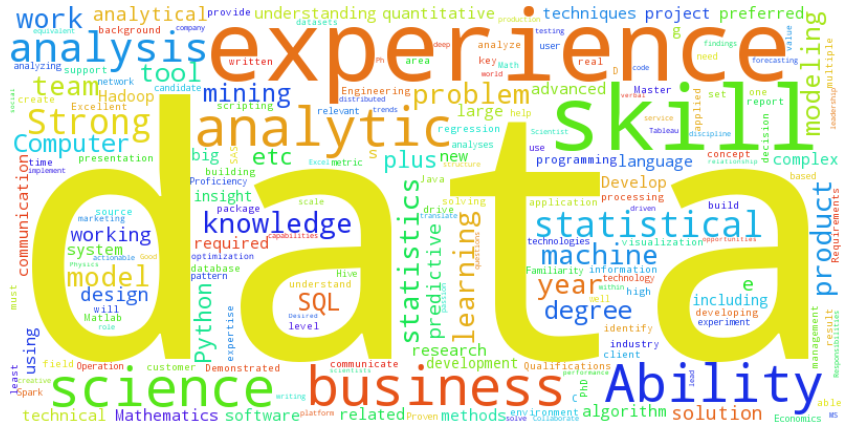

In [32]:
from wordcloud import WordCloud
word_ds = " ".join(df_train[df_train['y'] == 0]['X'])
wordcloud_ds = WordCloud(background_color='white', width=800, height=400).generate(word_ds)
plt.figure(figsize=(15, 9))
plt.imshow(wordcloud_ds.recolor(random_state=4))
plt.xticks([])
plt.yticks([])
plt.grid(False);

* digital marketer

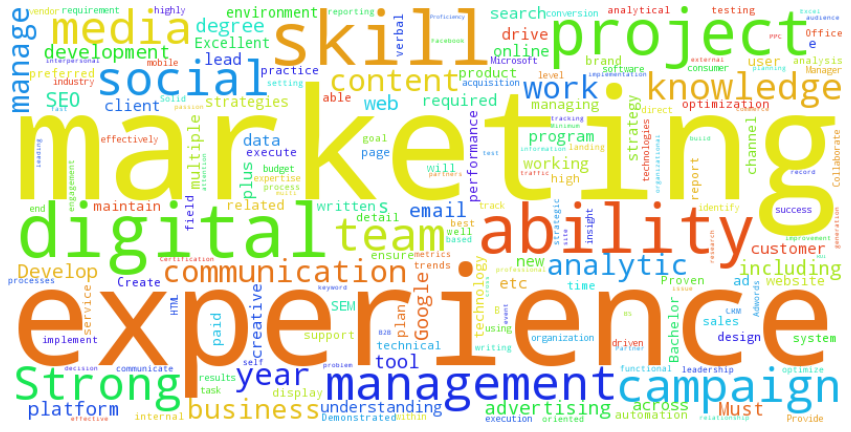

In [33]:
word_dm = " ".join(df_train[df_train['y'] == 1]['X'])
wordcloud_dm = WordCloud(background_color='white', width=800, height=400).generate(word_dm)
plt.figure(figsize=(15, 9))
plt.imshow(wordcloud_dm.recolor(random_state=4))
plt.xticks([])
plt.yticks([])
plt.grid(False);

* UX/UI designer

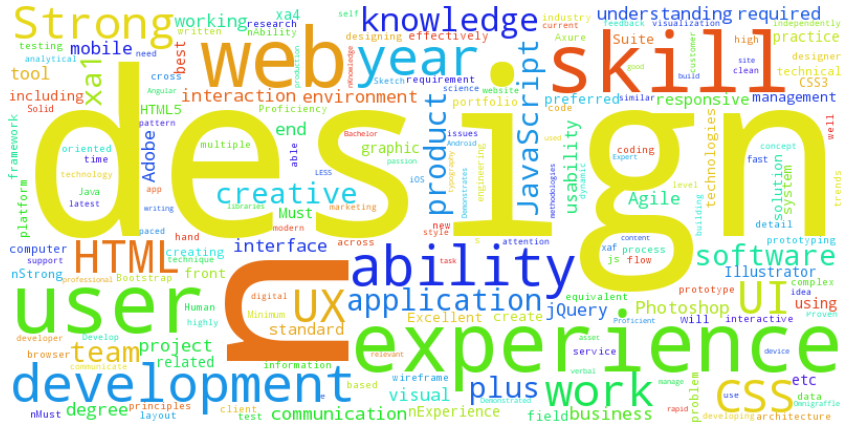

In [35]:
word_design = " ".join(df_train[df_train['y'] == 2]['X'])
wordcloud_design = WordCloud(background_color='white', width=800, height=400).generate(word_design)
plt.figure(figsize=(15, 9))
plt.imshow(wordcloud_design.recolor(random_state=4))
plt.xticks([])
plt.yticks([])
plt.grid(False);